# 기본 패키지

In [22]:
# 기본패키지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
#pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from catboost import CatBoostClassifier

# 배럴타구로 예측

In [3]:
data = pd.read_csv("./외국인타자MLB배럴성적2.csv")
data2 = pd.read_csv("./외국인타자MLB배럴성적2_라벨수정.csv")

In [4]:
data.head()

,영문이름,이름,구단,재계약,Season,Age,Pitches,Batted Balls,Barrels,Barrel%,...,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
0,Daniel Casey Dorn,대니 돈,키움,1.0,2015,30,125,20,0,0.0,...,8.6,25.0,0.184,0.234,0.192,0.215,0.279,35.0,31.3,6.3
1,Hector Alexis Gomez,헥터 고메즈,SSG,0.0,2015,27,488,89,3,3.4,...,14.2,36.0,0.222,0.311,0.231,0.250,0.342,29.2,29.9,2.2
2,Wilin Arismendy Rosario,윌린 로사리오,한화,1.0,2015,26,859,177,8,4.5,...,5.8,26.0,0.231,0.354,0.303,0.269,0.340,33.9,23.1,3.3
3,Justin Adam Maxwell,저스틴 맥스웰,롯데,0.0,2015,31,1030,175,9,5.1,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3
4,Xavier Ladel Scruggs,재비어 스크럭스,NC,1.0,2015,31,1030,175,9,5.1,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3


In [35]:
df_original = data.copy()
df = df_original.iloc[:-5]
X_train = df.drop(columns = ["영문이름","이름","Season","재계약","구단"])
y_train = df["재계약"]

In [6]:
df_original2 = data2.copy()
df2 = df_original2.iloc[:-5]
X_train2 = df2.drop(columns = ["영문이름","이름","Season","재계약"])
y_train2 = df2["재계약"]

In [7]:
df.tail(3)

,영문이름,이름,구단,재계약,Season,Age,Pitches,Batted Balls,Barrels,Barrel%,...,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
43,Zach Reks,잭 렉스,롯데,1.0,2021,28,160,27,0,0.0,...,18.7,33.3,0.187,0.265,0.189,0.194,0.317,40.7,38.6,0.0
44,Sócrates Brito,소크라테스 브리토,KIA,1.0,2019,26,165,22,1,4.5,...,-2.1,22.7,0.176,0.260,0.140,0.235,0.333,40.9,39.5,9.3
45,Mike Tauchman,마이크 터크먼,한화,0.0,2021,30,870,109,6,5.5,...,10.0,36.7,0.196,0.304,0.260,0.276,0.331,35.8,30.4,12.0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

lr = LogisticRegression()
cat = CatBoostClassifier(verbose=0)


In [9]:
X_train.shape

(46, 18)

In [10]:
X_train2.shape

(46, 18)

In [11]:
y_train.shape

(46,)

In [12]:
y_train.value_counts()

0.0    30
1.0    16
Name: 재계약, dtype: int64

In [13]:
y_train2.value_counts()

0.0    27
1.0    19
Name: 재계약, dtype: int64

In [14]:
16/46

0.34782608695652173

In [15]:
19/46

0.41304347826086957

In [16]:
skf = StratifiedKFold(n_splits = 5)

cross_val_score(cat, X_train, y_train, cv = skf).mean()

0.6977777777777777

In [36]:
xgb = XGBClassifier()
skf = StratifiedKFold(n_splits = 5)
cat = CatBoostClassifier(verbose=0)
lgbm = LGBMClassifier()
lr = LogisticRegression()
svc = SVC()
cross_val_score(xgb, X_train2, y_train2, cv = skf).mean()

0.48

In [37]:
cross_val_score(cat, X_train, y_train, cv = skf, scoring="f1").mean()

0.36

In [41]:
cross_val_score(svm, X_train, y_train, cv = skf, scoring="f1").mean()

0.0

In [18]:
cross_val_score(cat, X_train, y_train, cv = skf, scoring="precision").mean()

0.6

In [33]:
roc_auc = "roc_auc"


cat_auc = cross_val_score(cat, X_train, y_train, cv=skf, scoring = roc_auc)
lr_auc = cross_val_score(lr, X_train, y_train, cv = skf, scoring = roc_auc)

print(f"xgb_마이너리그 5-folds roc_auc : {cross_val_score(xgb, X_train, y_train, cv=skf, scoring = roc_auc)}, mean : {cross_val_score(xgb, X_train, y_train, cv=skf, scoring = roc_auc).mean()}")
print(f"cat_마이너리그 5-folds roc_auc : {cat_auc}, mean : {cat_auc.mean()}")
print(f"lr_마이너리그 5-folds roc_auc : {lr_auc}, mean : {lr_auc.mean()}")
print(f"lgbm_마이너리그 5-folds roc_auc : {cross_val_score(lgbm, X_train, y_train, cv=skf, scoring = roc_auc)}, mean : {cross_val_score(lgbm, X_train, y_train, cv=skf, scoring = roc_auc).mean()}")
#print(f"lr_마이너리그 5-folds roc_auc : {cross_val_score(lr, X_train y_train, cv=kfold, scoring = roc_auc)}, mean : {cross_val_score(lr, X_train, y_train, cv=kfold, scoring = roc_auc).mean()}")
print(f"svm_마이너리그 5-folds roc_auc : {cross_val_score(svc, X_train, y_train, cv=skf, scoring = roc_auc)}, mean : {cross_val_score(svc, X_train, y_train, cv=skf, scoring = roc_auc).mean()}")



xgb_마이너리그 5-folds roc_auc : [0.39583333 0.61111111 0.38888889 0.61111111 0.61111111], mean : 0.5236111111111111
cat_마이너리그 5-folds roc_auc : [0.3125     0.5        0.33333333 0.55555556 0.77777778], mean : 0.4958333333333333
lr_마이너리그 5-folds roc_auc : [0.27083333 0.88888889 0.44444444 0.61111111 0.66666667], mean : 0.576388888888889
lgbm_마이너리그 5-folds roc_auc : [0.5 0.5 0.5 0.5 0.5], mean : 0.5
svm_마이너리그 5-folds roc_auc : [0.35416667 0.55555556 0.33333333 0.66666667 0.83333333], mean : 0.548611111111111


In [34]:
accuracy = "accuracy"


cat_accuracy = cross_val_score(cat, X_train, y_train, cv=skf, scoring = accuracy)
lr_accuracy = cross_val_score(lr, X_train, y_train, cv = skf, scoring = accuracy)

print(f"xgb_마이너리그 5-folds roc_auc : {cross_val_score(xgb, X_train, y_train, cv=skf, scoring = accuracy)}, mean : {cross_val_score(xgb, X_train, y_train, cv=skf, scoring = accuracy).mean()}")
print(f"cat_마이너리그 5-folds roc_auc : {cat_accuracy}, mean : {cat_accuracy.mean()}")
print(f"lr_마이너리그 5-folds roc_auc : {lr_accuracy}, mean : {lr_accuracy.mean()}")
print(f"lgbm_마이너리그 5-folds roc_auc : {cross_val_score(lgbm, X_train, y_train, cv=skf, scoring = accuracy)}, mean : {cross_val_score(lgbm, X_train, y_train, cv=skf, scoring = accuracy).mean()}")
#print(f"lr_마이너리그 5-folds roc_auc : {cross_val_score(lr, X_train y_train, cv=kfold, scoring = roc_auc)}, mean : {cross_val_score(lr, X_train, y_train, cv=kfold, scoring = roc_auc).mean()}")
print(f"svm_마이너리그 5-folds roc_auc : {cross_val_score(svc, X_train, y_train, cv=skf, scoring = accuracy)}, mean : {cross_val_score(svc, X_train, y_train, cv=skf, scoring = accuracy).mean()}")



xgb_마이너리그 5-folds roc_auc : [0.5        0.77777778 0.33333333 0.66666667 0.77777778], mean : 0.611111111111111
cat_마이너리그 5-folds roc_auc : [0.6        0.77777778 0.77777778 0.66666667 0.66666667], mean : 0.6977777777777777
lr_마이너리그 5-folds roc_auc : [0.2        0.77777778 0.66666667 0.55555556 0.55555556], mean : 0.5511111111111111
lgbm_마이너리그 5-folds roc_auc : [0.6        0.66666667 0.66666667 0.66666667 0.66666667], mean : 0.6533333333333332
svm_마이너리그 5-folds roc_auc : [0.6        0.66666667 0.66666667 0.66666667 0.66666667], mean : 0.6533333333333332


In [32]:
lr_auc = cross_val_score(lr, X_train, y_train, cv = skf, scoring = roc_auc)
lr_auc

array([0.27083333, 0.88888889, 0.44444444, 0.61111111, 0.66666667])

In [39]:
cross_val_score(xgb, X_train2, y_train2, cv = skf, scoring="precision").mean()

0.3133333333333333

In [106]:
cross_val_score(cat, X_train, y_train, cv = skf, scoring="recall").mean()

0.26666666666666666

In [ ]:
cross_val_pre

In [107]:
cross_val_score(cat, X_train, y_train, cv = skf, scoring="f1").mean()

0.36

In [19]:
temp = cross_val_predict(cat, X_train2, y_train2, cv=skf)
temp2 = df_original2.copy()
temp2 = temp2.iloc[:-5]

In [20]:
temp2

,영문이름,이름,재계약,Season,Age,Pitches,Batted Balls,Barrels,Barrel%,Barrel/PA,...,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBACON,HardHit%,HardHit%.1,K%,BB%
0,Daniel Casey Dorn,대니돈,1.0,2015,30,125,20,0,0.0,0.0,...,8.6,25.0,0.184,0.234,0.192,0.215,0.279,35.0,31.3,6.3
1,Hector Alexis Gomez,헥터 고메즈,0.0,2015,27,488,89,3,3.4,2.2,...,14.2,36.0,0.222,0.311,0.231,0.250,0.342,29.2,29.9,2.2
2,Wilin Arismendy Rosario,윌린 로사리오,1.0,2015,26,859,177,8,4.5,3.3,...,5.8,26.0,0.231,0.354,0.303,0.269,0.340,33.9,23.1,3.3
3,Justin Adam Maxwell,저스틴 맥스웰,0.0,2015,31,1030,175,9,5.1,3.3,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3
4,Xavier Ladel Scruggs,재비어 스크럭스,1.0,2015,31,1030,175,9,5.1,3.3,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3
5,James Anthony Loney,제임스 로니,0.0,2016,32,1248,308,5,1.6,1.4,...,13.0,34.1,0.271,0.383,0.302,0.302,0.316,31.5,10.1,4.4
6,Danny Worth,대니 워스,0.0,2016,30,145,33,0,0.0,0.0,...,10.9,30.3,0.248,0.313,0.189,0.253,0.286,30.3,15.0,2.5
7,"James ""Jamie"" Robert Romak",제이미 로맥,1.0,2015,29,68,9,0,0.0,0.0,...,23.8,22.2,0.236,0.306,0.365,0.265,0.395,33.3,37.5,6.3
8,Darin Cortland Ruf,다린 러프,1.0,2016,29,351,60,5,8.3,5.6,...,15.2,33.3,0.236,0.455,0.245,0.305,0.408,40.0,28.1,4.5
9,jimmy paredes,지미 파레디스,0.0,2016,27,632,112,11,9.8,6.6,...,6.3,24.1,0.220,0.384,0.266,0.279,0.376,37.5,28.7,4.2


In [21]:
temp2["predict"] = temp

In [22]:
temp2[["이름","재계약","predict"]]

,이름,재계약,predict
0,대니돈,1.0,0.0
1,헥터 고메즈,0.0,1.0
2,윌린 로사리오,1.0,0.0
3,저스틴 맥스웰,0.0,0.0
4,재비어 스크럭스,1.0,0.0
5,제임스 로니,0.0,0.0
6,대니 워스,0.0,0.0
7,제이미 로맥,1.0,0.0
8,다린 러프,1.0,0.0
9,지미 파레디스,0.0,0.0


In [13]:
def plot_feature_importances(model,X,y):
    model.fit(X,y)
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
    ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
    
    plt.figure(figsize = (8,6))
    #plt.title("Feature importances Top 20")
    plt.title("인공지능이 생각하는 지표 중요도")
    sns.barplot(x=ftr_top20, y = ftr_top20.index)
    plt.show()

In [148]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def feature_importances_graph(X,y):
    model = LogisticRegression()
    model.fit(X,y)
    importances = pd.DataFrame(data = {"Attribute" : X.columns,
                                      "Importance" : abs(model.coef_[0])})
    importances = importances.sort_values(by = "Importance", ascending = False)
    
    plt.bar(x = importances["Attribute"], height = importances["Importance"])
    plt.title("Feature importances", size = 15)
    plt.xticks(rotation = 'vertical')
    plt.show()

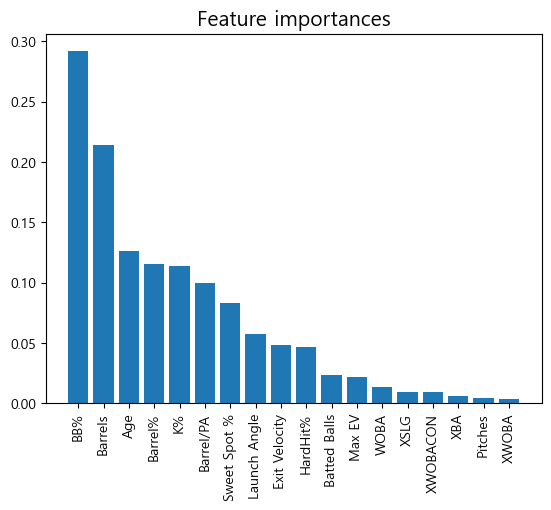

In [149]:
feature_importances_graph(X_train, y_train)

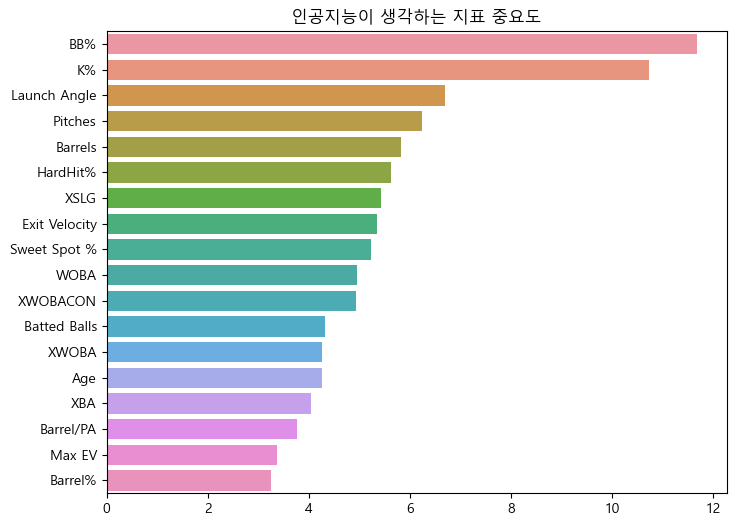

In [30]:
plot_feature_importances(cat,X_train,y_train)

In [33]:
cat.fit(X_train,y_train)
ftr_importances_values = cat.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

In [34]:
ftr_top20

BB%              11.683520
K%               10.726065
Launch Angle      6.689760
Pitches           6.239050
Barrels           5.824610
HardHit%          5.631071
XSLG              5.437022
Exit Velocity     5.354125
Sweet Spot %      5.231808
WOBA              4.954387
XWOBACON          4.940307
Batted Balls      4.314418
XWOBA             4.270920
Age               4.268149
XBA               4.050653
Barrel/PA         3.769380
Max EV            3.367314
Barrel%           3.247444
dtype: float64

In [120]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_scaled = ss.transform(X_train)
cross_predict = cross_val_predict(cat, X_scaled,y_train, cv=skf)
cross_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [121]:
xgb = XGBClassifier()
svm = SVC()

In [122]:
temp = cross_val_predict(cat, X_scaled,y_train, cv=skf)

In [123]:
cross_val_predict(cat, X_scaled,y_train, cv=skf, method="predict_proba")

array([[0.70822159, 0.29177841],
       [0.54745821, 0.45254179],
       [0.8305181 , 0.1694819 ],
       [0.86787474, 0.13212526],
       [0.86787474, 0.13212526],
       [0.69700017, 0.30299983],
       [0.6903891 , 0.3096109 ],
       [0.63607714, 0.36392286],
       [0.7898188 , 0.2101812 ],
       [0.76381267, 0.23618733],
       [0.61498239, 0.38501761],
       [0.6825499 , 0.3174501 ],
       [0.46992652, 0.53007348],
       [0.70708646, 0.29291354],
       [0.7728829 , 0.2271171 ],
       [0.61607232, 0.38392768],
       [0.77559517, 0.22440483],
       [0.74962027, 0.25037973],
       [0.61503148, 0.38496852],
       [0.82920635, 0.17079365],
       [0.65914187, 0.34085813],
       [0.69164815, 0.30835185],
       [0.63062679, 0.36937321],
       [0.71738332, 0.28261668],
       [0.45491689, 0.54508311],
       [0.52581997, 0.47418003],
       [0.56758997, 0.43241003],
       [0.52531641, 0.47468359],
       [0.7407708 , 0.2592292 ],
       [0.79901961, 0.20098039],
       [0.

In [124]:
temp_df = pd.DataFrame({"name" : df["이름"],
                        "label" : df["재계약"],
                       "predict" : temp})

In [125]:
temp_df

,name,label,predict
0,대니 돈,1.0,0.0
1,헥터 고메즈,0.0,0.0
2,윌린 로사리오,1.0,0.0
3,저스틴 맥스웰,0.0,0.0
4,재비어 스크럭스,1.0,0.0
5,제임스 로니,0.0,0.0
6,대니 워스,0.0,0.0
7,제이미 로맥,1.0,0.0
8,다린 러프,1.0,0.0
9,지미 파레디스,0.0,0.0


In [115]:
temp_df["label"].value_counts()

0.0    30
1.0    16
Name: label, dtype: int64

In [116]:
30/46

0.6521739130434783

In [76]:
from sklearn.model_selection import cross_val_predict

In [83]:
temp = cross_val_predict(svm, X_train,y_train, cv=skf)

In [84]:
len(temp)

46

In [85]:
temp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
temp_df = pd.DataFrame({"name" : df["이름"],
                        "label" : df["재계약"],
                       "predict" : temp})

In [81]:
temp_df

,name,label,predict
0,대니 돈,1.0,0.0
1,헥터 고메즈,0.0,1.0
2,윌린 로사리오,1.0,1.0
3,저스틴 맥스웰,0.0,0.0
4,재비어 스크럭스,1.0,0.0
5,제임스 로니,0.0,1.0
6,대니 워스,0.0,1.0
7,제이미 로맥,1.0,0.0
8,다린 러프,1.0,1.0
9,지미 파레디스,0.0,1.0


In [11]:
cross_val_score(cat, X_train, y_train, cv=skf, scoring = "f1" ).mean()

0.36

In [12]:
cross_val_score(cat, X_train, y_train, cv=skf, scoring = "recall" ).mean()

0.26666666666666666

In [152]:
cross_val_score(cat, X_train, y_train, cv=skf, scoring = "precision" ).mean()

0.6

In [14]:
cross_val_score(cat, X_train, y_train, cv=skf, scoring = "roc_auc" ).mean()

0.4958333333333333

In [129]:
cross_val_score(cat, X_train, y_train, cv=skf, scoring = "accuracy" ).mean()

0.6977777777777777

In [150]:
cross_val_score(lr, X_train, y_train, cv=skf, scoring = "accuracy" ).mean()

0.5511111111111111

In [151]:
cross_val_score(lr, X_train, y_train, cv=skf, scoring = "precision" ).mean()

0.3333333333333333

In [31]:
y_train.value_counts()

0.0    30
1.0    16
Name: 재계약, dtype: int64

## 2023 예측

In [169]:
df_original = data.copy()
df = df_original.iloc[-5:]
X_test = df.drop(columns = ["영문이름","이름","Season","재계약"])
y_test = df["재계약"]

In [171]:
cat.fit(X_train, y_train)

In [173]:
X_test

,Age,Pitches,Batted Balls,Barrels,Barrel%,Barrel/PA,Exit Velocity,Max EV,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
46,31,347,44,5,11.4,6.1,86.0,107.3,14.6,38.6,0.160,0.289,0.246,0.228,0.331,31.8,39.0,7.3
47,27,170,21,1,4.8,2.6,87.4,107.1,5.1,33.3,0.193,0.311,0.320,0.290,0.327,33.3,28.9,15.8
48,25,608,105,8,7.6,5.2,87.5,108.1,11.4,33.3,0.226,0.380,0.260,0.280,0.359,33.3,26.6,5.2
49,29,228,37,1,2.7,1.8,84.8,107.0,27.9,21.6,0.167,0.231,0.134,0.182,0.264,32.4,33.3,0.0
50,29,272,36,2,5.6,3.3,89.6,106.0,21.5,22.2,0.197,0.344,0.265,0.293,0.344,44.4,27.9,13.1


In [172]:
cat.predict_proba(X_test)

array([[0.43913406, 0.56086594],
       [0.78404867, 0.21595133],
       [0.66560205, 0.33439795],
       [0.63242286, 0.36757714],
       [0.7711966 , 0.2288034 ]])

In [38]:
drop_indexes = X_train[X_train["Batted Balls"] < 30].index

In [51]:
drop_indexes

Int64Index([0, 7, 10, 20, 21, 27, 30, 31, 36, 39, 41, 43, 44], dtype='int64')

In [43]:
X_train2 = X_train.drop(index = drop_indexes).reset_index(drop = True)
y_train2 = y_train.drop(index = drop_indexes).reset_index(drop = True)

In [44]:
y_train2.value_counts()

0.0    23
1.0    10
Name: 재계약, dtype: int64

In [45]:
cross_val_score(cat, X_train2, y_train2, cv=skf, scoring = "accuracy" )

array([0.71428571, 0.71428571, 0.71428571, 0.66666667, 0.66666667])

In [50]:
cross_val_score(cat, X_train2, y_train2, cv=skf, scoring = "f1" )

array([0., 0., 0., 0., 0.])

In [47]:
cross_val_score(cat, X_train2, y_train2, cv=skf, scoring = "recall" )

array([0., 0., 0., 0., 0.])

In [48]:
cross_val_score(cat, X_train2, y_train2, cv=skf, scoring = "precision" )

array([0., 0., 0., 0., 0.])

In [49]:
cross_val_score(cat, X_train2, y_train2, cv=skf, scoring = "roc_auc" )

array([0.15 , 0.4  , 0.6  , 0.875, 0.875])

In [101]:
cross_val_score(xgb, X_train2, y_train2, cv=skf, scoring = "accuracy" )

array([0.28571429, 0.57142857, 0.71428571, 0.66666667, 0.66666667])

In [102]:
cross_val_score(xgb, X_train2, y_train2, cv=skf, scoring = "f1" )

array([0. , 0. , 0.5, 0.5, 0. ])

# 마이너성적 + 배럴타구

In [155]:
minor = pd.read_csv("./외국인타자_마이너성적.csv")

In [156]:
# 메이저에만 있는 선수들
set(df["이름"]) - set(minor["이름"])

{'야시엘 푸이그', '제레미 헤즐베이커', '후안 라가레스'}

In [157]:
df2 = pd.merge(df, minor, on = "이름")
df2 = df2.drop(columns = ["영문이름","이름"])

In [158]:
X_train3 = df2.drop(columns = ["재계약","Season","구단","재계약여부"])
y_train3 = df2["재계약"]

In [159]:
y_train3.value_counts()

0.0    27
1.0    18
Name: 재계약, dtype: int64

In [168]:
18/45

0.4

In [160]:
# 야시엘 푸이그, 후안 라가레스 마이너 성적 없으므로 drop
X_train3[X_train3["G"].isnull()]

,Age,Pitches,Batted Balls,Barrels,Barrel%,Barrel/PA,Exit Velocity,Max EV,Launch Angle,Sweet Spot %,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB


In [161]:
#y_train3[X_train3["G"].notnull()].reset_index(drop = True)

In [162]:
y_train3 = y_train3[X_train3["G"].notnull()].reset_index(drop = True)
X_train3 = X_train3.dropna(axis=0).reset_index(drop = True)



In [163]:
cross_val_score(cat, X_train3, y_train3, cv=skf, scoring = "accuracy" ).mean()

0.6444444444444444

In [164]:
cross_val_score(cat, X_train3, y_train3, cv=skf, scoring = "precision" ).mean()

0.5333333333333333

In [165]:
cross_val_score(lr, X_train3, y_train3, cv=skf, scoring = "accuracy" ).mean()

0.6444444444444445

In [166]:
cross_val_score(lr, X_train3, y_train3, cv=skf, scoring = "precision" ).mean()

0.47000000000000003

In [114]:
svc = SVC()
xgb = XGBClassifier()


In [115]:
cross_val_score(xgb, X_train3, y_train3, cv=skf, scoring = "accuracy" ).mean()

0.6444444444444445

In [116]:
cross_val_score(xgb, X_train3, y_train3, cv=skf, scoring = "f1" ).mean()

0.48

In [117]:
cross_val_score(svc, X_train3, y_train3, cv=skf, scoring = "f1" )

array([0., 0., 0., 0., 0.])

In [119]:
cross_val_score(lr, X_train3, y_train3, cv=skf, scoring = "f1" ).mean()

0.4833333333333333

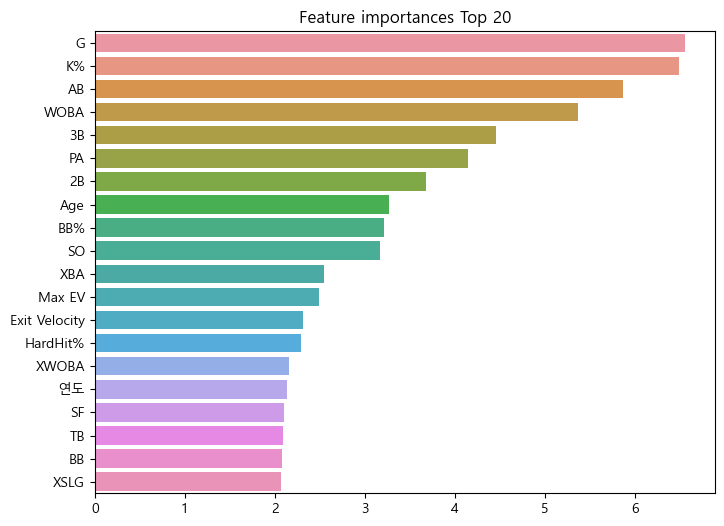

In [141]:
plot_feature_importances(cat,X_train3,y_train3)

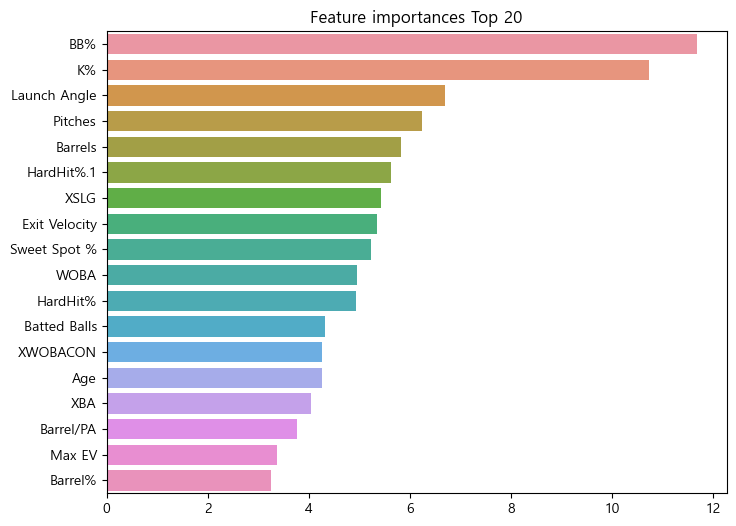

In [100]:
plot_feature_importances(cat,X_train,y_train)

In [104]:
X_train3.shape

(32, 43)

In [107]:
cross_val_score(xgb, X_train2, y_train2, cv=skf, scoring = "accuracy" ).mean()

0.5809523809523809

In [108]:
23/33

0.696969696969697

In [109]:
X_train3

,Age,Pitches,Batted Balls,Barrels,Barrel%,Barrel/PA,Exit Velocity,Max EV,Launch Angle,Sweet Spot %,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
0,27,488,89,3,3.4,2.2,86.2,111.8,14.2,36.0,...,0.358,0.400,0.623,1.023,66,3,1,0,1,2
1,26,859,177,8,4.5,3.3,88.3,113.8,5.8,26.0,...,0.297,0.329,0.534,0.863,79,7,2,0,0,0
2,31,1030,175,9,5.1,3.3,88.3,110.7,10.3,30.9,...,0.285,0.352,0.464,0.816,96,6,3,0,3,0
3,31,1030,175,9,5.1,3.3,88.3,110.7,10.3,30.9,...,0.290,0.408,0.565,0.973,179,10,6,0,1,4
4,32,1248,308,5,1.6,1.4,87.5,108.9,13.0,34.1,...,0.342,0.373,0.424,0.797,67,9,0,0,2,0
5,30,145,33,0,0.0,0.0,86.8,103.8,10.9,30.3,...,0.330,0.431,0.525,0.955,159,5,4,1,6,1
6,29,68,9,0,0.0,0.0,87.4,112.2,23.8,22.2,...,0.284,0.363,0.549,0.912,267,11,4,0,7,0
7,29,351,60,5,8.3,5.6,89.2,109.9,15.2,33.3,...,0.294,0.356,0.529,0.885,185,7,7,0,4,1
8,27,632,112,11,9.8,6.6,89.9,110.4,6.3,24.1,...,0.309,0.377,0.471,0.847,32,1,2,0,1,1
9,30,200,26,4,15.4,8.3,86.5,107.7,17.9,38.5,...,0.222,0.317,0.365,0.682,84,4,7,0,2,0
